In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [6]:
data1 = pd.read_csv('./Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
data2 = pd.read_csv('./Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
data3 = pd.read_csv('./Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

C:\Users\Shakshi\AppData\Local\Temp\ipykernel_28140\1959097952.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv('./Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
b'Skipping line 533719: expected 23 fields, saw 24\n'
C:\Users\Shakshi\AppData\Local\Temp\ipykernel_28140\1959097952.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv('./Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
b'Skipping line 1149094: expected 23 fields, saw 41\n'
C:\Users\Shakshi\AppData\Local\Temp\ipykernel_28140\1959097952.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data3 = pd.read_csv('./Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)


In [7]:
data = pd.concat([data1, data2,data3])

### 1. display top 5 rows

In [8]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


### 2. check last 5 rows

In [9]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


### 3. find shape

In [10]:
data.shape

(6017767, 23)

### 4. get info of dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

### 6. check null values

In [12]:
data.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

### 6. select only necessary columns

In [13]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [15]:
df = data[['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest', 'Domestic']]

In [16]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


### 7. check null values from df dataset

In [17]:
df.isna().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isna().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 241.0+ MB


In [23]:
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


### 8. find top 10 primary crime types

In [28]:
df['Primary Type'].value_counts().head(10)

THEFT                  1244395
BATTERY                1079174
CRIMINAL DAMAGE         702696
NARCOTICS               674829
BURGLARY                369053
OTHER OFFENSE           368168
ASSAULT                 360242
MOTOR VEHICLE THEFT     271624
ROBBERY                 229463
DECEPTIVE PRACTICE      223947
Name: Primary Type, dtype: int64

### 9. how many criminals are arrested having primary crime type is theft ?

In [31]:
df[df['Primary Type'] == "THEFT"]['Arrest'].value_counts()

False    1103085
True      141310
Name: Arrest, dtype: int64

### 10. find top 10 crime location descriptions

In [32]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [33]:
df['Location Description'].value_counts().head(10)

STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: Location Description, dtype: int64

### 11. how many are arrested having location type is STREET ?

In [34]:
df[df['Location Description'] == "STREET"]['Arrest'].value_counts()

False    1093718
True      424006
Name: Arrest, dtype: int64

In [35]:
df.index = pd.DatetimeIndex(df.Date)

In [36]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False


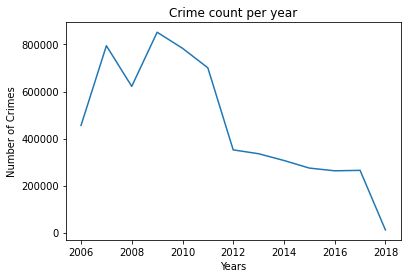

In [38]:
plt.plot(df.resample('Y').size())
plt.title("Crime count per year")
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.show()

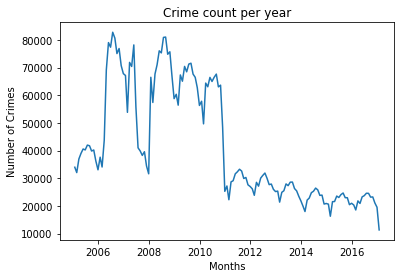

In [58]:
plt.plot(df.resample('M').size())
plt.title("Crime count per year")
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.show()

### preparing data

In [40]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [42]:
df_prophet.columns = ['Date', 'Crime Count']

In [43]:
df_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


### rename columns

##### ds and y --> dateStamp and measurement

In [44]:
df_prophet = df_prophet.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [45]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


### train model

In [47]:
m = Prophet()
m.fit(df_prophet)

23:33:19 - cmdstanpy - INFO - Chain [1] start processing
23:33:19 - cmdstanpy - INFO - Chain [1] done processing


### make predictions

In [48]:
pred = m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(pred)

In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60513.420000,38486.816629,72831.705066,60513.420000,60513.420000,-4715.532689,-4715.532689,-4715.532689,-4715.532689,-4715.532689,-4715.532689,0.0,0.0,0.0,55797.887311
1,2005-02-28,60381.011089,34869.539807,66806.456232,60381.011089,60381.011089,-9482.198263,-9482.198263,-9482.198263,-9482.198263,-9482.198263,-9482.198263,0.0,0.0,0.0,50898.812826
2,2005-03-31,60234.415508,42010.204569,75976.894201,60234.415508,60234.415508,-1209.367104,-1209.367104,-1209.367104,-1209.367104,-1209.367104,-1209.367104,0.0,0.0,0.0,59025.048404
3,2005-04-30,60092.548818,46104.306190,78611.335110,60092.548818,60092.548818,1173.323744,1173.323744,1173.323744,1173.323744,1173.323744,1173.323744,0.0,0.0,0.0,61265.872562
4,2005-05-31,59945.953238,50101.897277,80813.044860,59945.953238,59945.953238,5476.748131,5476.748131,5476.748131,5476.748131,5476.748131,5476.748131,0.0,0.0,0.0,65422.701369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6972.038637,-8254.170076,24922.329428,6607.413529,7294.921573,1814.054045,1814.054045,1814.054045,1814.054045,1814.054045,1814.054045,0.0,0.0,0.0,8786.092682
165,2018-10-31,6566.927673,-8608.649415,24616.298556,6170.624106,6914.423629,2458.075271,2458.075271,2458.075271,2458.075271,2458.075271,2458.075271,0.0,0.0,0.0,9025.002944
166,2018-11-30,6174.884804,-12596.916187,22233.799837,5749.628911,6551.330703,-2014.175530,-2014.175530,-2014.175530,-2014.175530,-2014.175530,-2014.175530,0.0,0.0,0.0,4160.709274
167,2018-12-31,5769.773839,-17180.468243,15852.021559,5305.983112,6180.925886,-5977.953083,-5977.953083,-5977.953083,-5977.953083,-5977.953083,-5977.953083,0.0,0.0,0.0,-208.179244


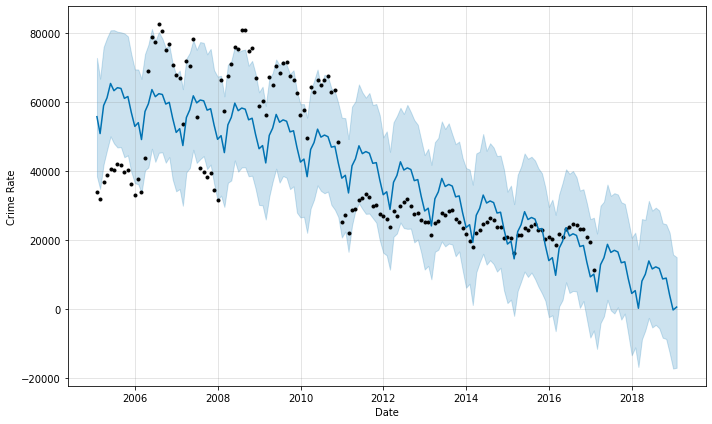

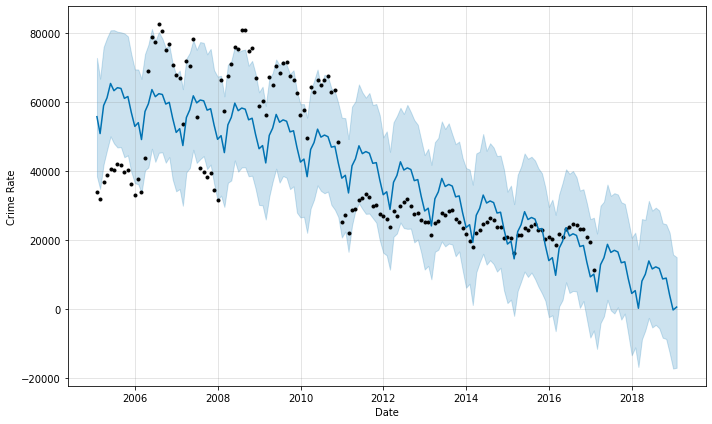

In [50]:
m.plot(forecast, xlabel='Date', ylabel="Crime Rate")

### Save model

In [51]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model', 'w') as fout:
    json.dump(model_to_json(m), fout)

In [53]:
with open('prophet_model', 'r') as fin:
    m1 = model_from_json(json.load(fin))

c:\Users\Shakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [54]:
x = int(input("Enter numbers months to forcast: "))

In [55]:
pred = m1.make_future_dataframe(periods=x, freq='M')
forecast = m1.predict(pred)

In [56]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60513.420000,38374.516150,73250.172749,60513.420000,60513.420000,-4715.532689,-4715.532689,-4715.532689,-4715.532689,-4715.532689,-4715.532689,0.0,0.0,0.0,55797.887311
1,2005-02-28,60381.011089,34014.606077,67932.131442,60381.011089,60381.011089,-9482.198263,-9482.198263,-9482.198263,-9482.198263,-9482.198263,-9482.198263,0.0,0.0,0.0,50898.812826
2,2005-03-31,60234.415508,43299.266130,74968.851842,60234.415508,60234.415508,-1209.367104,-1209.367104,-1209.367104,-1209.367104,-1209.367104,-1209.367104,0.0,0.0,0.0,59025.048404
3,2005-04-30,60092.548818,43670.988798,77978.016554,60092.548818,60092.548818,1173.323744,1173.323744,1173.323744,1173.323744,1173.323744,1173.323744,0.0,0.0,0.0,61265.872562
4,2005-05-31,59945.953238,48586.201398,82311.891826,59945.953238,59945.953238,5476.748131,5476.748131,5476.748131,5476.748131,5476.748131,5476.748131,0.0,0.0,0.0,65422.701369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6972.038637,-7750.427210,25590.451248,6591.297107,7313.448335,1814.054045,1814.054045,1814.054045,1814.054045,1814.054045,1814.054045,0.0,0.0,0.0,8786.092682
165,2018-10-31,6566.927673,-8128.289206,25363.143782,6160.387760,6937.240168,2458.075271,2458.075271,2458.075271,2458.075271,2458.075271,2458.075271,0.0,0.0,0.0,9025.002944
166,2018-11-30,6174.884804,-11558.628973,19994.153418,5750.057990,6573.747852,-2014.175530,-2014.175530,-2014.175530,-2014.175530,-2014.175530,-2014.175530,0.0,0.0,0.0,4160.709274
167,2018-12-31,5769.773839,-17888.340445,16671.350518,5318.159827,6197.464889,-5977.953083,-5977.953083,-5977.953083,-5977.953083,-5977.953083,-5977.953083,0.0,0.0,0.0,-208.179244


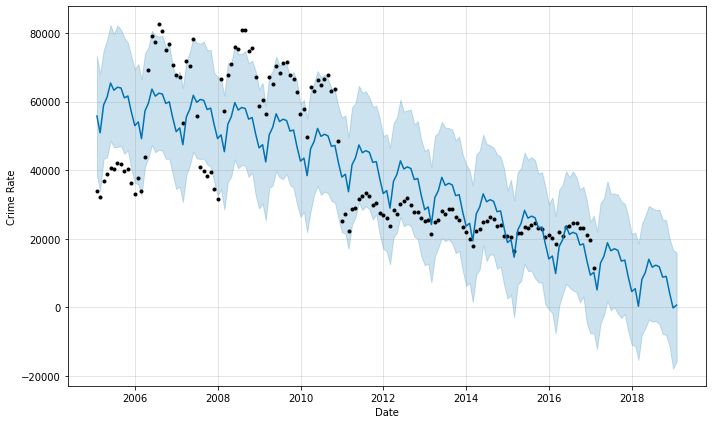

In [57]:
figure = m1.plot(forecast, xlabel='Date', ylabel='Crime Rate')